In [9]:
# 8_plots_splicing_time.ipynb
# Ashley Mae Conard
# Last Mod. 9/12/2019
# Purpose: Plot alternative splicing genes within categories (all females, all males, females sex specific, male sex specific, female all rest, male all rest, female non-sex specific, male non-sex specific, female new sex specific, male new sex specific) over time.

# Libraries
import pandas as pd
pd.set_option('display.max_colwidth',None)
#import mygene 
#from biothings_client import get_client
import glob, os, sys
import collections as c
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_15433/906089938.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


# User input
#### (Please edit with your own data, then run.)

In [2]:
#### User input ####
# Volcano Plot Inputs
RESULTS_VOL = "/data/compbio/aconard/splicing_pj/results/suppa_results_ncbi_trans/"
INPUTFILE_PSI = RESULTS_VOL+"/merged_0-2_cf_cm/clampRNAi_diffSplice.dpsi"
INPUTFILE_DTU = RESULTS_VOL+"/merged_0-2_cf_cm/clampRNAi_diffSplice_iso_dtu.dpsi"
MEASURE = "PSI" #"DPSI"
OUTPUT_NAME = "0-2_cf_cm"
VOL_TITLE_PLOT = "0-2 Female vs. Male controls"

# Lineplot timepoints
INPUTDIR_LINE = "/data/compbio/aconard/splicing_pj/splicing/suppa_results/final_matrices/"
LINE_TITLE_PLOT = "Timeseries Line Plot Across Categories"
TP_1 = INPUTDIR_LINE+"/df9_0_2_psi.tsv" # df9_0_2_dtu.tsv # First timepoint
TIME1_NAME = 0 # actual time point
TP_2 = INPUTDIR_LINE+"/df9_2_4_psi.tsv" # df9_2_4_dtu.tsv # Second timepoint
TIME2_NAME = 2 # actual time point

OUTDIR = "/tmp/"
####

# Volcano Plots
#### (No need to edit. Simply run.)

/home/aconard/anaconda/envs/multio_case_ctrl/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


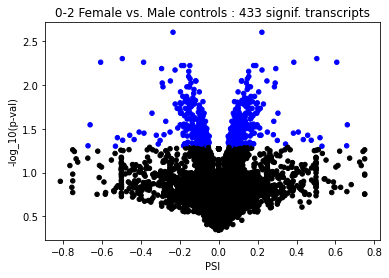

In [3]:
# Volcano plots
df = pd.read_csv(INPUTFILE_DTU, sep="\t")
df["nlog10_pval"] = -np.log10(df[df.columns[1]])

cols = np.where(df["nlog10_pval"]>=1.301029995664,'b','k')
df.plot.scatter(c = cols, x=df.columns[0],
                   y='nlog10_pval')

plt.title('%s : %s signif. transcripts'%(VOL_TITLE_PLOT, cols.tolist().count('b')))
plt.xlabel(MEASURE)
plt.ylabel('-log_10(p-val)')
 
# Show graphic
plt.savefig(OUTDIR+"/"+OUTPUT_NAME+"_volcano.pdf")

# Line Plots
#### (No need to edit. Simply run.)

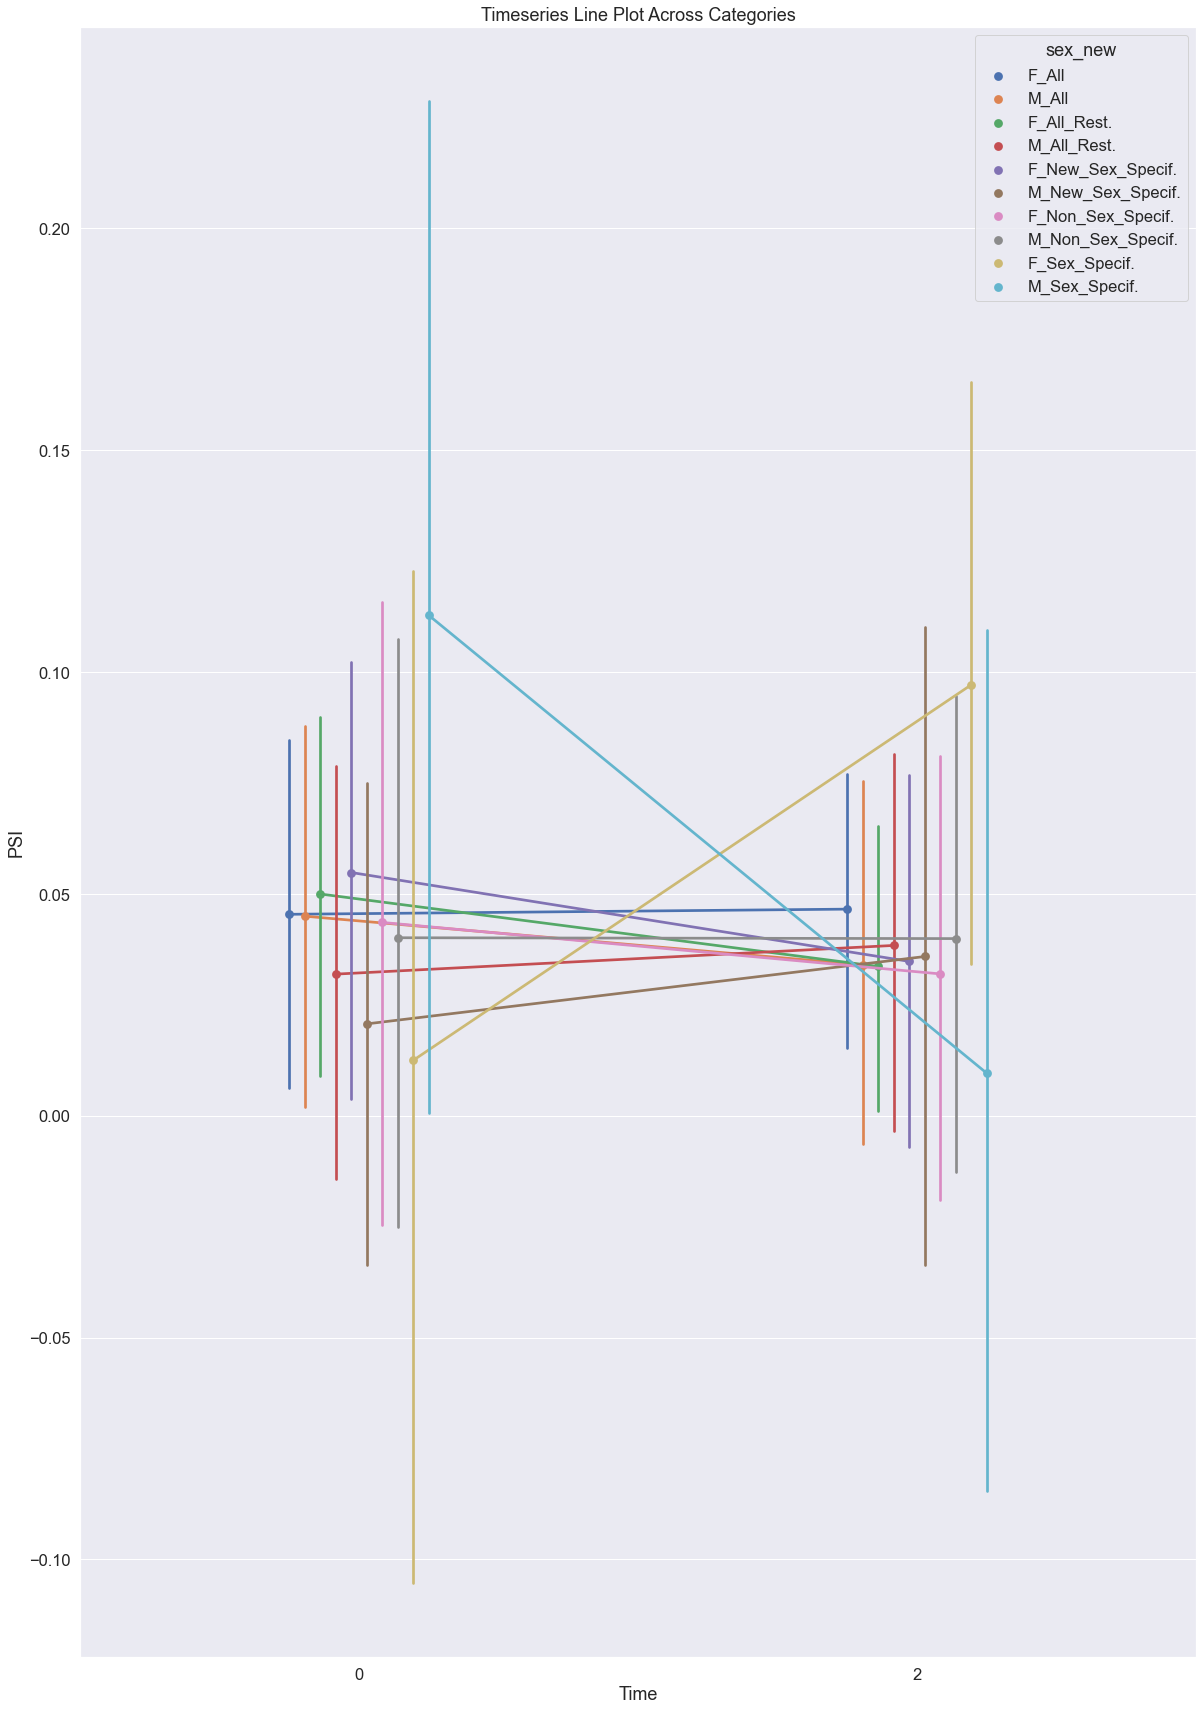

In [8]:
# Line plot
df9_tp1_psi = pd.read_csv(TP_1, sep="\t")
df9_tp1_psi = df9_tp1_psi.rename({df9_tp1_psi.columns[1]: 'pval'}, axis='columns')
df9_tp1_psi = df9_tp1_psi.set_index(list(df9_tp1_psi)[0])
df9_tp1_psi['Splicing Event Categories'] = df9_tp1_psi['sex'].str.split(':').str[0]
df9_tp1_psi.index.name = None

df9_tp2_psi = pd.read_csv(TP_2, sep="\t")
df9_tp2_psi = df9_tp2_psi.rename({df9_tp2_psi.columns[1]: 'pval'}, axis='columns')
df9_tp2_psi = df9_tp2_psi.set_index(list(df9_tp2_psi)[0])
df9_tp2_psi['Splicing Event Categories'] = df9_tp2_psi['sex'].str.split(':').str[0]
df9_tp2_psi.index.name = None

df9_tp1_psi['time'] = 1
df9_tp2_psi['time'] = 2
df_tpall_psi = df9_tp1_psi.append(df9_tp2_psi)
sns.set(style="whitegrid")
sns.set(font_scale = 1.5)
f = plt.figure(figsize=(20,30))
ax = f.add_subplot(111)

sns.pointplot(x="time", y=df_tpall_psi.columns[0],hue="Splicing Event Categories", data=df_tpall_psi, dodge=True, join=True)# , legend_out = True)

#ax.get_legend().set_visible(False)
ax.set(xlabel='Time', ylabel='PSI')
plt.title(LINE_TITLE_PLOT)
plt.savefig(OUTDIR+"/timepoints_all_%s-%s_pointplot_long_PSI.pdf"%(TIME1_NAME, TIME2_NAME))
plt.show()